In [1]:
airlines = read.csv("./data/AirlinesCluster.csv")

In [2]:
str(airlines)

'data.frame':	3999 obs. of  7 variables:
 $ Balance        : int  28143 19244 41354 14776 97752 16420 84914 20856 443003 104860 ...
 $ QualMiles      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ BonusMiles     : int  174 215 4123 500 43300 0 27482 5250 1753 28426 ...
 $ BonusTrans     : int  1 2 4 1 26 0 25 4 43 28 ...
 $ FlightMiles    : int  0 0 0 0 2077 0 0 250 3850 1150 ...
 $ FlightTrans    : int  0 0 0 0 4 0 0 1 12 3 ...
 $ DaysSinceEnroll: int  7000 6968 7034 6952 6935 6942 6994 6938 6948 6931 ...


In [3]:
summary(airlines)

    Balance          QualMiles         BonusMiles       BonusTrans  
 Min.   :      0   Min.   :    0.0   Min.   :     0   Min.   : 0.0  
 1st Qu.:  18528   1st Qu.:    0.0   1st Qu.:  1250   1st Qu.: 3.0  
 Median :  43097   Median :    0.0   Median :  7171   Median :12.0  
 Mean   :  73601   Mean   :  144.1   Mean   : 17145   Mean   :11.6  
 3rd Qu.:  92404   3rd Qu.:    0.0   3rd Qu.: 23801   3rd Qu.:17.0  
 Max.   :1704838   Max.   :11148.0   Max.   :263685   Max.   :86.0  
  FlightMiles       FlightTrans     DaysSinceEnroll
 Min.   :    0.0   Min.   : 0.000   Min.   :   2   
 1st Qu.:    0.0   1st Qu.: 0.000   1st Qu.:2330   
 Median :    0.0   Median : 0.000   Median :4096   
 Mean   :  460.1   Mean   : 1.374   Mean   :4119   
 3rd Qu.:  311.0   3rd Qu.: 1.000   3rd Qu.:5790   
 Max.   :30817.0   Max.   :53.000   Max.   :8296   

数据标准化。

In [4]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [6]:
preproc = preProcess(airlines)
airlinesNorm = predict(preproc, airlines)
summary(airlinesNorm)

    Balance          QualMiles         BonusMiles        BonusTrans      
 Min.   :-0.7303   Min.   :-0.1863   Min.   :-0.7099   Min.   :-1.20805  
 1st Qu.:-0.5465   1st Qu.:-0.1863   1st Qu.:-0.6581   1st Qu.:-0.89568  
 Median :-0.3027   Median :-0.1863   Median :-0.4130   Median : 0.04145  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.1866   3rd Qu.:-0.1863   3rd Qu.: 0.2756   3rd Qu.: 0.56208  
 Max.   :16.1868   Max.   :14.2231   Max.   :10.2083   Max.   : 7.74673  
  FlightMiles       FlightTrans       DaysSinceEnroll   
 Min.   :-0.3286   Min.   :-0.36212   Min.   :-1.99336  
 1st Qu.:-0.3286   1st Qu.:-0.36212   1st Qu.:-0.86607  
 Median :-0.3286   Median :-0.36212   Median :-0.01092  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1065   3rd Qu.:-0.09849   3rd Qu.: 0.80960  
 Max.   :21.6803   Max.   :13.61035   Max.   : 2.02284  

In [8]:
distances = dist(airlinesNorm, method="euclidean")
clusterAirlines = hclust(distances, method="ward.D")

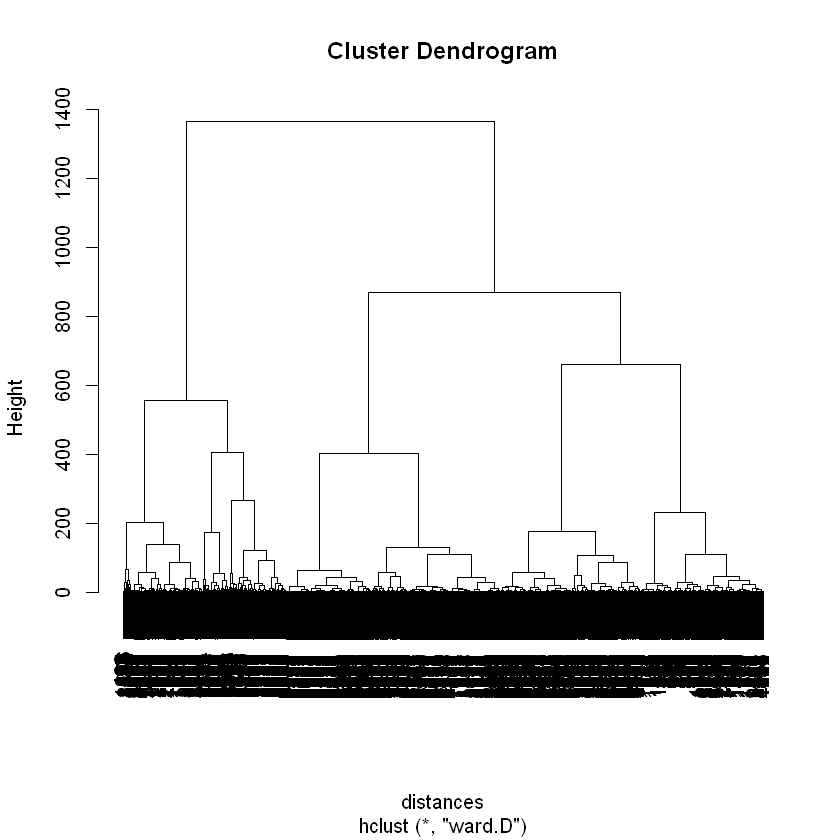

In [9]:
plot(clusterAirlines)

In [10]:
clusterGroups = cutree(clusterAirlines, k=5)
cluster1 = subset(airlinesNorm, clusterGroups==1)
nrow(cluster1)

[1] 776

In [11]:
tapply(airlines$Balance, clusterGroups, mean)

1         2         3         4         5 
 57866.90 110669.27 198191.57  52335.91  36255.91

In [12]:
tapply(airlines$QualMiles, clusterGroups, mean)

1            2            3            4            5 
   0.6443299 1065.9826590   30.3461538    4.8479263    2.5111773

In [13]:
tapply(airlines$BonusMiles, clusterGroups, mean)

1         2         3         4         5 
10360.124 22881.763 55795.860 20788.766  2264.788

In [14]:
tapply(airlines$BonusTrans, clusterGroups, mean)

1         2         3         4         5 
10.823454 18.229287 19.663968 17.087558  2.973174

In [15]:
tapply(airlines$FlightMiles, clusterGroups, mean)

1          2          3          4          5 
  83.18428 2613.41811  327.67611  111.57373  119.32191

In [16]:
tapply(airlines$FlightTrans, clusterGroups, mean)

1         2         3         4         5 
0.3028351 7.4026975 1.0688259 0.3444700 0.4388972

In [17]:
tapply(airlines$DaysSinceEnroll, clusterGroups, mean)

1        2        3        4        5 
6235.365 4402.414 5615.709 2840.823 3060.081

In [18]:
set.seed(88)
k = 5
KMC = kmeans(airlinesNorm, centers=k, iter.max=1000)
str(KMC)

List of 9
 $ cluster     : int [1:3999] 4 4 4 4 1 4 3 4 2 3 ...
 $ centers     : num [1:5, 1:7] 1.4444 1.0005 -0.0558 -0.1333 -0.4058 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:7] "Balance" "QualMiles" "BonusMiles" "BonusTrans" ...
 $ totss       : num 27986
 $ withinss    : num [1:5] 4948 3624 2054 2040 2321
 $ tot.withinss: num 14987
 $ betweenss   : num 12999
 $ size        : int [1:5] 408 141 993 1182 1275
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"
